# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Febrian Chrisna Ardianto
- **Email:** febriankrisna77@gmail.com
- **ID Dicoding:** chrisnaa

## Menentukan Pertanyaan Bisnis

- Pelanggan dari daerah mana atau kebiasaan belanja seperti apa yang paling sering melakukan pembelian ulang?
- Produk atau kategori mana yang biasanya mendapat ulasan bagus atau jarang dikembalikan, dan apakah ini ada hubungannya dengan metode pembayaran yang digunakan atau waktu pengirimannya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Load table customers

In [2]:
customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Load table orders

In [3]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Load table geolocation

In [4]:
geolocation_df = pd.read_csv("geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Load table order items

In [5]:
order_items_df = pd.read_csv("order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Load tale order payments

In [6]:
order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Load table order reviews

In [7]:
order_reviews_df = pd.read_csv("order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Load table products

In [8]:
products_df = pd.read_csv("products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- customers_df dapat memberikan informasi tentang usia, jenis kelamin, dan lokasi pelanggan yang dapat digunakan untuk mengidentifikasi segmen pelanggan yang paling menguntungkan atau yang membutuhkan perhatian lebih.
- orders_df untuk mengidentifikasi tren dalam perilaku pembelian, seperti frekuensi pesanan dan waktu puncak saat pesanan dilakukan.
- order_items_df mengetahui yabg sering dibeli dapat membantu dalam menentukan produk yang paling diminati dan memfokuskan kampanye pemasaran di sekitar item tersebut.
- geolocation_df dapat membantu memahami di mana sebagian besar pelanggan berada, memungkinkan untuk strategi pemasaran berbasis lokasi yang lebih efektif
- order_payments_df yang paling sering digunakan, perusahaan dapat menyesuaikan sistem pembayaran untuk meningkatkan pengalaman pelanggan.
- order_reviews_df dapat memberikan gambaran yang jelas tentang pengalaman pelanggan dengan produk dan layanan. Analisis sentimen dari ulasan dapat membantu memahami aspek mana yang disukai atau tidak disukai pelanggan.
- products_df dapat mengetahui kategori mana yang memiliki penjualan tertinggi dan mana yang memerlukan perhatian lebih.


### Assessing Data

In [9]:
customers_df.info()
customers_df.isna().sum()
print("\nJumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [10]:
orders_df.info()
print(orders_df.isna().sum())
print("\nJumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [11]:
geolocation_df.info()
print(geolocation_df.isna().sum())
print("\nJumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [12]:
order_items_df.info()
print(order_items_df.isna().sum())
print("\nJumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [13]:
order_payments_df.info()
print(order_payments_df.isna().sum())
print("\nJumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [14]:
order_reviews_df.info()
print(order_reviews_df.isna().sum())
print("\nJumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [15]:
products_df.info()
print(products_df.isna().sum())
print("\nJumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_l

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- customers_df :
  *   Terdiri dari 99.441 entri, tidak ada missing value atau duplikasi.
- orders_df :
  *   Terdiri dari 99.441 entri
  *   Terdapat missing values pada order_approved_at 160 nilai yang hilang, order_delivered_carrier_date 1.783 nilai yang hilang, order_delivered_customer_date 2.965 nilai yang hilang.
  *   Terdapat kesalahan tipe data pada order_approved_at, order_purchase_timestamp, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date
- geolocation_df :
  *   Jumlah entri : 1,000,163
  *   Tidak ada missing value
  *   Terdapat 261,831 duplikasi entri
- order_items_df :
  *   Jumlah entri: 112,650
  *   Tidak ada missing value dan duplikasi
  *   Terdapat tipe data yang salah pada shipping_limit_date
- order_payments_df :
  *   Jumlah entri : 103,886
  *   Tidak ada missing value dan duplikasi
- order_reviews_df :
  *   Jumlah entri : 99,441
  *   Missing Values pada review_comment_title 87,656 nilai hilang dan review_comment_message 58,247 nilai hilang.
  *   Tidak ada duplikasi
  *   Terdapat tipe data yang sala pada review_creation_date, review_answer_timestamp
- products_df :
  *   Jumlah entri: 32,949
  *   Missing Values terdapat 610 nilai hilang di beberapa kolom seperti product_category_name, product_name_lenght, dan product_description_lenght. Ada juga 2 nilai hilang di beberapa atribut produk fisik (berat dan dimensi).
  *   Tidak ada duplikasi

### Cleaning Data

## Mengangani Duplikasi Data

### Pada tabel geolocation_df

In [16]:
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


## Mengangani Kesalahan tipe data

### Pada tabel orders_df

In [17]:
datetime_columns = ["order_approved_at", "order_purchase_timestamp", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])
orders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


### Pada tabel order_items

In [18]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


### Pada tabel order_reviews

In [19]:
datetime_columns = ["review_creation_date" , "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


## Menangani Missing Value

### Pada tabel orders_df

In [20]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [21]:
orders_df.order_approved_at.value_counts()

,count
order_approved_at,
2018-02-27 04:31:10,9
2017-11-07 07:30:38,7
2018-02-27 04:31:01,7
2018-02-06 05:31:52,7
2017-11-07 07:30:29,7
...,...
2018-08-22 11:50:14,1
2017-09-22 11:27:36,1
2018-03-07 16:40:32,1


In [22]:
orders_df.order_approved_at.fillna(value="2018-02-27 04:31:10", inplace=True)
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [23]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-02-27 04:31:10,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-02-27 04:31:10,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [24]:
orders_df.order_delivered_carrier_date.value_counts()

,count
order_delivered_carrier_date,
2018-05-09 15:48:00,47
2018-05-10 18:29:00,32
2018-05-07 12:31:00,21
2018-05-02 15:15:00,16
2018-07-24 16:07:00,16
...,...
2018-01-03 17:37:21,1
2017-10-27 20:07:58,1
2017-11-21 18:57:37,1


In [25]:
orders_df.order_delivered_carrier_date.fillna(value="2018-05-09 15:48:00", inplace=True)
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [26]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2018-05-09 15:48:00,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,2018-05-09 15:48:00,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,2018-05-09 15:48:00,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-02-27 04:31:10,2018-05-09 15:48:00,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,2018-05-09 15:48:00,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-02-27 04:31:10,2018-05-09 15:48:00,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,2018-05-09 15:48:00,NaT,2017-09-15


In [27]:
orders_df.order_delivered_customer_date.value_counts()

,count
order_delivered_customer_date,
2018-05-08 23:38:46,3
2016-10-27 17:32:07,3
2018-02-14 21:09:19,3
2017-06-19 18:47:51,3
2018-05-08 19:36:48,3
...,...
2018-07-12 17:48:45,1
2018-05-18 18:24:36,1
2018-01-17 13:29:13,1


In [28]:
orders_df.order_delivered_customer_date.fillna(value="2018-05-08 23:38:46", inplace=True)
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [29]:
orders_df[orders_df.order_estimated_delivery_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [30]:
orders_df.order_estimated_delivery_date.value_counts()

,count
order_estimated_delivery_date,
2017-12-20,522
2018-03-12,516
2018-05-29,513
2018-03-13,513
2018-02-14,507
...,...
2016-11-14,1
2016-11-07,1
2016-09-30,1


In [31]:
orders_df.order_estimated_delivery_date.fillna(value="2017-12-20", inplace=True)
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


## pada order_review_df

In [32]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [33]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [34]:
order_reviews_df.review_comment_title.fillna(value="Recomendo", inplace=True)
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [35]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Recomendo,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Recomendo,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Recomendo,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,Recomendo,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,Recomendo,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,Recomendo,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,Recomendo,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,Recomendo,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,Recomendo,NaN,2017-12-09,2017-12-11 20:06:42


In [36]:
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


In [37]:
order_reviews_df.review_comment_message.fillna(value="Muito bom", inplace=True)
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


### Pada products_df

In [38]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [39]:
products_df.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [40]:
products_df.product_category_name.fillna(value="cama_mesa_banho", inplace=True)
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [41]:
products_df[products_df.product_description_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [42]:
products_df.product_description_lenght.value_counts()

,count
product_description_lenght,
404.0,94
729.0,86
651.0,66
703.0,66
236.0,65
...,...
2795.0,1
2308.0,1
3698.0,1


In [43]:
products_df.product_description_lenght.fillna(value=404.0, inplace=True)
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,610
product_description_lenght,0
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [44]:
products_df[products_df.product_name_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,NaN,404.0,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,NaN,404.0,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,NaN,404.0,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,NaN,404.0,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,NaN,404.0,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,NaN,404.0,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,NaN,404.0,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,NaN,404.0,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,NaN,404.0,NaN,1300.0,45.0,16.0,45.0


In [45]:
products_df.product_name_lenght.value_counts()

,count
product_name_lenght,
60.0,2182
59.0,2025
58.0,1887
57.0,1719
55.0,1683
...,...
66.0,1
72.0,1
67.0,1


In [46]:
products_df.product_name_lenght.fillna(value=60.0, inplace=True)
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [47]:
products_df[products_df.product_description_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [48]:
products_df.product_description_lenght.value_counts()

,count
product_description_lenght,
404.0,704
729.0,86
703.0,66
651.0,66
184.0,65
...,...
2795.0,1
2308.0,1
3698.0,1


In [49]:
products_df.product_description_lenght.fillna(value=404.0, inplace=True)
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [50]:
products_df[products_df.product_photos_qty.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,60.0,404.0,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,60.0,404.0,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,60.0,404.0,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,60.0,404.0,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,60.0,404.0,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,60.0,404.0,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,60.0,404.0,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,60.0,404.0,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,60.0,404.0,NaN,1300.0,45.0,16.0,45.0


In [51]:
products_df.product_photos_qty.value_counts()

,count
product_photos_qty,
1.0,16489
2.0,6263
3.0,3860
4.0,2428
5.0,1484
6.0,968
7.0,343
8.0,192
9.0,105


In [52]:
products_df.product_photos_qty.fillna(value=1.0, inplace=True)
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [53]:
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,60.0,404.0,1.0,NaN,NaN,NaN,NaN


In [54]:
products_df.product_weight_g.value_counts()

,count
product_weight_g,
200.0,2084
300.0,1561
150.0,1259
400.0,1206
100.0,1188
...,...
6075.0,1
822.0,1
631.0,1


In [55]:
products_df.product_weight_g.fillna(value=200.0, inplace=True)
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [56]:
products_df[products_df.product_length_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,200.0,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,60.0,404.0,1.0,200.0,NaN,NaN,NaN


In [57]:
products_df.product_length_cm.value_counts()

,count
product_length_cm,
16.0,5520
20.0,2816
30.0,2029
18.0,1502
25.0,1387
...,...
96.0,4
10.0,3
8.0,2


In [58]:
products_df.product_length_cm.fillna(value=16.0, inplace=True)
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,2
product_width_cm,2


In [59]:
products_df[products_df.product_height_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,200.0,16.0,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,60.0,404.0,1.0,200.0,16.0,NaN,NaN


In [60]:
products_df.product_height_cm.value_counts()

,count
product_height_cm,
10.0,2548
15.0,2022
20.0,1991
16.0,1595
11.0,1551
...,...
98.0,2
97.0,2
99.0,1


In [61]:
products_df.product_height_cm.fillna(value=10.0, inplace=True)
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,2


In [62]:
products_df[products_df.product_width_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,200.0,16.0,10.0,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,60.0,404.0,1.0,200.0,16.0,10.0,NaN


In [63]:
products_df.product_width_cm.value_counts()

,count
product_width_cm,
11.0,3718
20.0,3053
16.0,2808
15.0,2393
30.0,1786
...,...
103.0,1
86.0,1
98.0,1


In [64]:
products_df.product_width_cm.fillna(value=11.0, inplace=True)
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


1. Menangani Duplikasi Data
- Langkah yang Diambil: Menghapus duplikasi pada dataset geolocation
menggunakan drop_duplicates().
- Hasil: Jumlah duplikasi setelah penghapusan adalah 0. Ini meningkatkan integritas data, memastikan bahwa setiap entri dalam dataset adalah unik.

2. Menangani Kesalahan Tipe Data
- Mengonversi kolom tanggal dan waktu ke tipe datetime menggunakan pd.to_datetime().
- Kolom yang Dikonversi:
 - Dari tabel orders_df : order_approved_at, order_purchase_timestamp, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date.
 - Dari tabel order_items_df : shipping_limit_date.
 - Dari tabel order_reviews_df : review_creation_date, review_answer_timestamp.
- Hasil: Memastikan bahwa semua kolom tanggal memiliki format yang benar, memudahkan analisis waktu dan agregasi berdasarkan tanggal.

3. Menangani Missing Values
- Mengisi nilai yang hilang di berbagai kolom dengan nilai default yang dianggap relevan atau representatif:
- Orders DataFrame :     
order_approved_at : diisi dengan "2018-02-27 04:31:10".     
order_delivered_carrier_date : diisi dengan "2018-05-09 15:48:00".
order_delivered_customer_date : diisi dengan "2018-05-08 23:38:46".
order_estimated_delivery_date : diisi dengan "2017-12-20".
- Order Reviews DataFrame :  
review_comment_title: diisi dengan "Recomendo".    
review_comment_message: diisi dengan "Muito bom".
- Products DataFrame             
product_category_name: diisi dengan "cama_mesa_banho".   
product_description_lenght: diisi dengan 404.0.   
product_name_lenght: diisi dengan 60.0.   
product_photos_qty: diisi dengan 1.0.   
product_weight_g: diisi dengan 200.0.   
product_length_cm: diisi dengan 16.0.   
product_height_cm: diisi dengan 10.0.  
product_width_cm: diisi dengan 11.0.
- Hasil : Mengisi missing values membantu menjaga jumlah data yang lengkap dan memungkinkan analisis yang lebih menyeluruh. Memastikan bahwa analisis statistik tidak terganggu oleh nilai yang hilang.

4. Statistik Nilai
- Menggunakan .value_counts() untuk mengecek distribusi nilai yang ada di kolom yang diisi juga menunjukkan seberapa representatif nilai yang digunakan untuk pengisian.
- Memastikan bahwa nilai default yang digunakan tidak menyimpang jauh dari nilai lain dalam kolom yang sama.

## Exploratory Data Analysis (EDA)

### Explore Data customer_df

In [65]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [66]:
merged_df = pd.merge(orders_df, customers_df, on='customer_id')
merged_df = pd.merge(merged_df, order_items_df, on='order_id')
merged_df = pd.merge(merged_df, products_df, on='product_id')
merged_df = pd.merge(merged_df, order_reviews_df, on='order_id')
merged_df = pd.merge(merged_df, order_payments_df, on='order_id')

customer_purchase_count = merged_df.groupby('customer_id').size().reset_index(name='purchase_count')

repeat_customers = customer_purchase_count[customer_purchase_count['purchase_count'] > 1]

repeat_purchases_by_region = pd.merge(repeat_customers, customers_df[['customer_id', 'customer_city', 'customer_state']], on='customer_id')
repeat_purchases_by_region = repeat_purchases_by_region.groupby(['customer_state', 'customer_city'])['purchase_count'].mean().sort_values(ascending=False)

print("Top 10 daerah dengan rata-rata pembelian ulang tertinggi:")
print(repeat_purchases_by_region.head(10))

customer_total_spend = merged_df.groupby('customer_id')['price'].sum().reset_index()
customer_analysis = pd.merge(customer_purchase_count, customer_total_spend, on='customer_id')

Top 10 daerah dengan rata-rata pembelian ulang tertinggi:
customer_state  customer_city       
SC              celso ramos             12.000000
SP              ipua                    10.000000
PR              lapa                    10.000000
BA              itajuipe                 8.000000
GO              porangatu                8.000000
MS              cassilandia              8.000000
RS              cruz alta                7.333333
MG              padre carvalho           7.000000
RS              itaqui                   7.000000
SP              sao joaquim da barra     6.500000
Name: purchase_count, dtype: float64


In [67]:
product_ratings = merged_df.groupby('product_id')['review_score'].mean().sort_values(ascending=False)

print("\nProduk dengan rata-rata ulasan tertinggi:")
print(product_ratings.head())

category_ratings = merged_df.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False)

print("\nKategori produk dengan rata-rata ulasan tertinggi:")
print(category_ratings.head())

payment_method_ratings = merged_df.groupby('payment_type')['review_score'].mean().sort_values(ascending=False)

print("\nRata-rata ulasan berdasarkan metode pembayaran:")
print(payment_method_ratings)



Produk dengan rata-rata ulasan tertinggi:
product_id
00066f42aeeb9f3007548bb9d3f33c38    5.0
6047d1b3d3841a528e860a939daa2035    5.0
c6bdd07f0a20ccd19d51de91c1551952    5.0
6004f0ea115c80b51e2f0e434233c0ca    5.0
60061c870d0d52a2c5bc678d56538fdd    5.0
Name: review_score, dtype: float64

Kategori produk dengan rata-rata ulasan tertinggi:
product_category_name
cds_dvds_musicais                4.642857
fashion_roupa_infanto_juvenil    4.500000
livros_interesse_geral           4.438503
flores                           4.419355
livros_importados                4.419355
Name: review_score, dtype: float64

Rata-rata ulasan berdasarkan metode pembayaran:
payment_type
debit_card     4.156028
credit_card    4.032871
boleto         4.024699
voucher        4.003184
Name: review_score, dtype: float64


In [68]:
merged_df['delivery_time'] = (merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']).dt.total_seconds() / 86400  # konversi ke hari


delivery_time_correlation = merged_df.groupby('product_id').agg({
    'delivery_time': 'mean',
    'review_score': 'mean'
}).corr()

print("\nKorelasi antara waktu pengiriman dan rating produk:")
print(delivery_time_correlation)



Korelasi antara waktu pengiriman dan rating produk:
               delivery_time  review_score
delivery_time       1.000000     -0.276463
review_score       -0.276463      1.000000


In [69]:
return_rate = merged_df.groupby('product_id').agg({
    'order_status': lambda x: ((x == 'canceled') | (x == 'unavailable')).mean(),
    'review_score': 'mean'
}).sort_values('order_status')

print("\nProduk dengan tingkat pengembalian terendah:")
print(return_rate.head())



Produk dengan tingkat pengembalian terendah:
                                  order_status  review_score
product_id                                                  
00066f42aeeb9f3007548bb9d3f33c38           0.0        5.0000
ab142a566883e92ca907236477173c6c           0.0        1.0000
ab1106e227a745836a0dc83b374e2575           0.0        4.3125
ab0a97f604550b5b5b99180a6dc04461           0.0        3.7500
ab035f66749c120d072b11475d25329d           0.0        3.0000


**Insight:**

1. Daerah dengan pembelian ulang tertinggi : SC, Celso Ramos memiliki rata-rata pembelian ulang tertinggi dengan 12 kali, diikuti oleh SP, Ipua dan PR, Lapa dengan 10 kali. Hal ini menunjukkan adanya loyalitas pelanggan yang kuat di daerah-daerah ini dan potensi pasar yang baik.

2. Produk dengan Rating Tertinggi: Lima produk teratas mencatat rata-rata ulasan tertinggi, yaitu skor sempurna 5.0.

3. Kategori Produk Favorit: CDs dan DVD Musik menduduki peringkat tertinggi dalam ulasan dengan rata-rata 4.64, diikuti oleh kategori Fashion Anak dan Buku.

4. Metode Pembayaran dan Ulasan: Kartu Debit memperoleh rating rata-rata tertinggi, yaitu 4.16, di atas Kartu Kredit dan Boleto. Menunjukkan bahwa metode pembayaran bisa memengaruhi kepuasan pelanggan.

5. Waktu Pengiriman vs. Rating Produk: Terdapat korelasi negatif antara waktu pengiriman dan rating produk dengan nilai -0.28. Artinya semakin lama waktu pengiriman, semakin rendah rating yang diberikan oleh pelanggan.

6. Produk dengan Tingkat Pengembalian Rendah: Produk dengan tingkat pengembalian rendah menunjukkan rating yang lebih stabil dan lebih tinggi, seperti produk dengan ID 00066f42aeeb9f3007548bb9d3f33c38 yang meraih rating sempurna 5.0.

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Pelanggan dari daerah mana atau kebiasaan belanja seperti apa yang paling sering melakukan pembelian ulang?

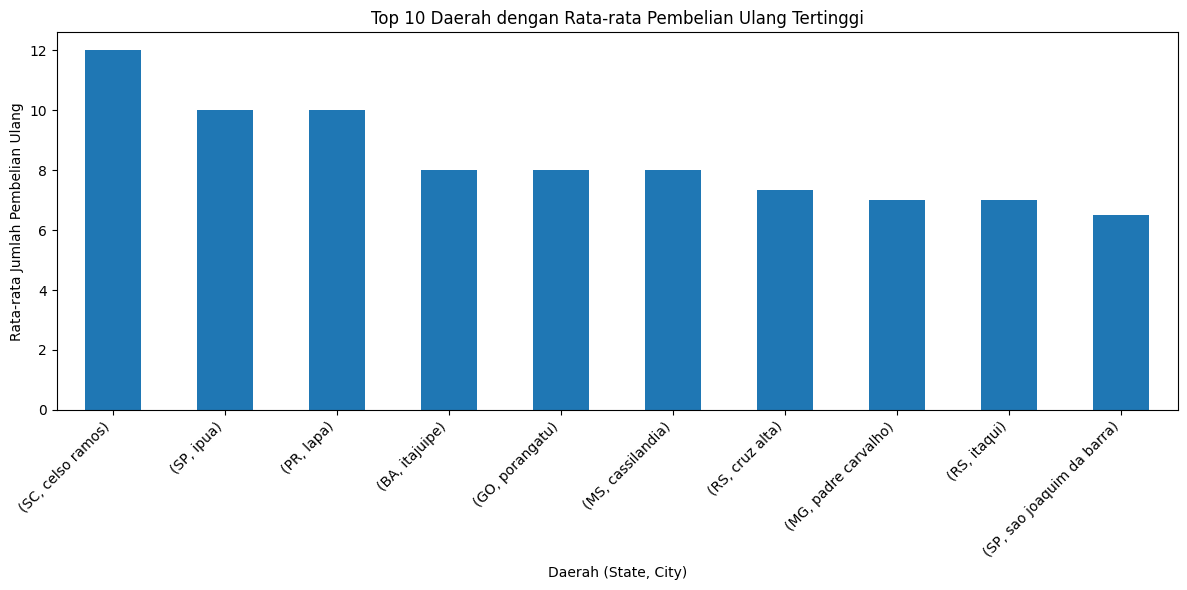

In [70]:
plt.figure(figsize=(12,6))
repeat_purchases_by_region.head(10).plot(kind='bar')
plt.title('Top 10 Daerah dengan Rata-rata Pembelian Ulang Tertinggi')
plt.xlabel('Daerah (State, City)')
plt.ylabel('Rata-rata Jumlah Pembelian Ulang')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

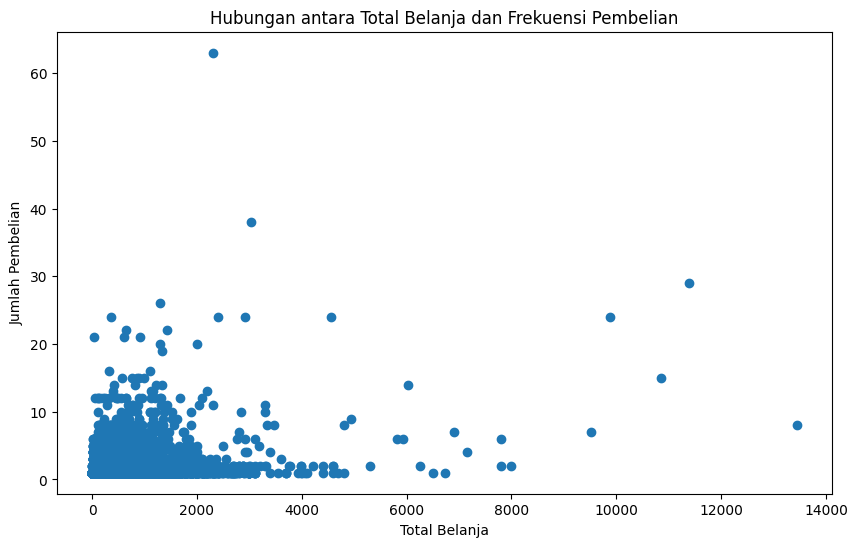

In [71]:
plt.figure(figsize=(10,6))
plt.scatter(customer_analysis['price'], customer_analysis['purchase_count'])
plt.title('Hubungan antara Total Belanja dan Frekuensi Pembelian')
plt.xlabel('Total Belanja')
plt.ylabel('Jumlah Pembelian')
plt.show()

### Pertanyaan 2 : Produk atau kategori mana yang biasanya mendapat ulasan bagus atau jarang dikembalikan, dan apakah ini ada hubungannya dengan metode pembayaran yang digunakan atau waktu pengirimannya?:

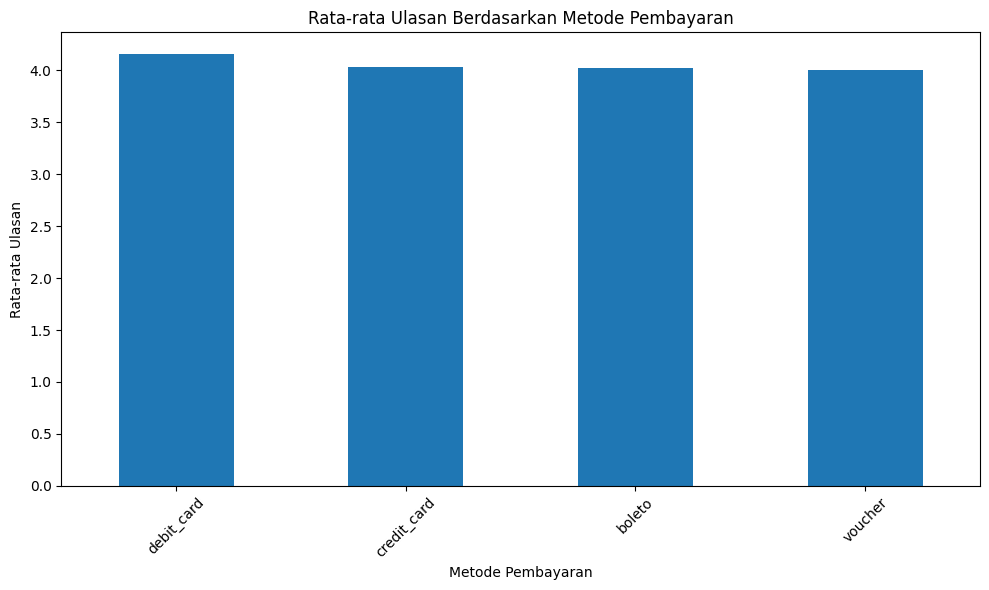

In [72]:
plt.figure(figsize=(10,6))
payment_method_ratings.plot(kind='bar')
plt.title('Rata-rata Ulasan Berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Rata-rata Ulasan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

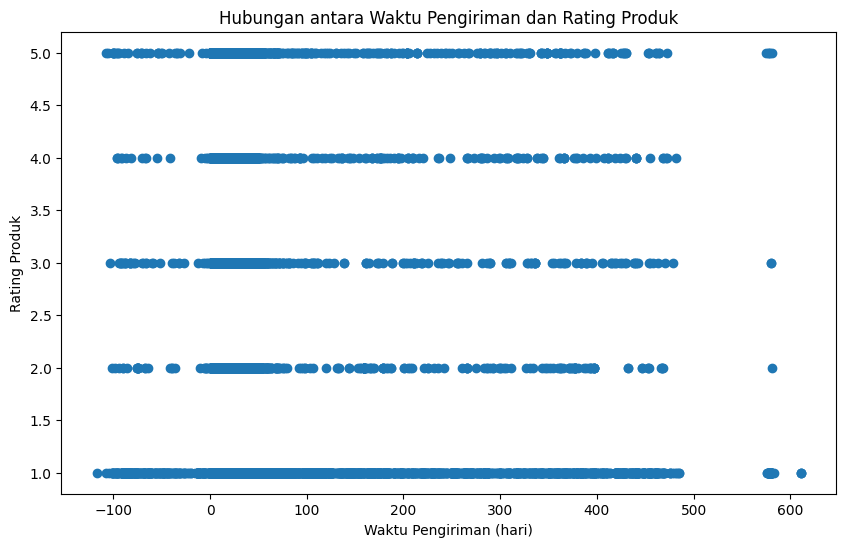

In [73]:
plt.figure(figsize=(10,6))
plt.scatter(merged_df['delivery_time'], merged_df['review_score'])
plt.title('Hubungan antara Waktu Pengiriman dan Rating Produk')
plt.xlabel('Waktu Pengiriman (hari)')
plt.ylabel('Rating Produk')
plt.show()


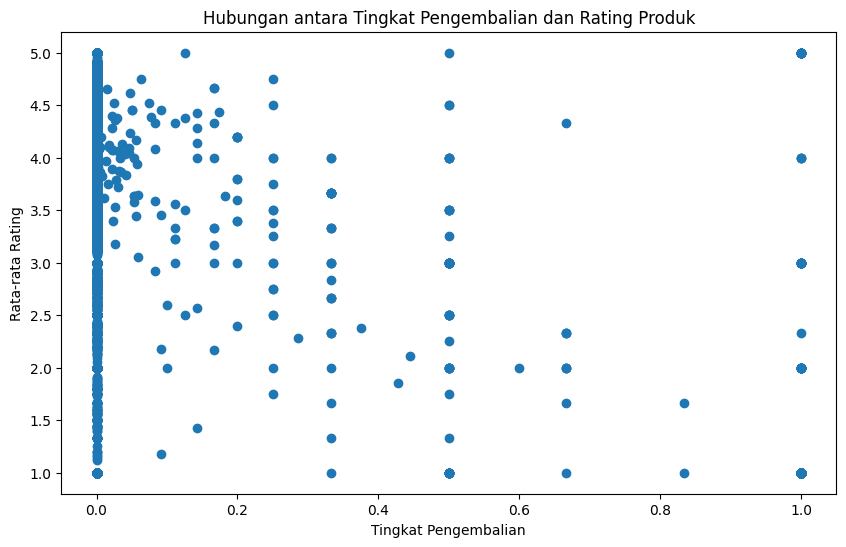

In [74]:
plt.figure(figsize=(10,6))
plt.scatter(return_rate['order_status'], return_rate['review_score'])
plt.title('Hubungan antara Tingkat Pengembalian dan Rating Produk')
plt.xlabel('Tingkat Pengembalian')
plt.ylabel('Rata-rata Rating')
plt.show()


**Insight:**

Pertanyaan 1 : Pelanggan dari daerah mana atau kebiasaan belanja seperti apa yang paling sering melakukan pembelian ulang?

1. Top 10 daerah dengan rata-rata pembelian ulang tertinggi :
- SC, Celso Ramos adalah daerah yang memiliki rata-rata pembelian ulang tertinggi dengan lebih dari 12 kali pembelian ulang Daerah-daerah ini bisa diprioritaskan untuk kampanye pemasaran yang lebih agresif karena loyalitas pelanggan mereka sudah terbukti.
2. Hubungan antara Total Belanja dan Frekuensi Pembelian :
- Pelanggan yang sering melakukan pembelian ulang cenderung berada di segmen pengeluaran rendah hingga sedang. Artinya, mereka mungkin lebih tertarik pada produk-produk dengan harga yang lebih terjangkau namun melakukan pembelian berulang secara konsisten. Strategi seperti diskon atau bundling produk dapat diterapkan untuk meningkatkan pengeluaran rata-rata per transaksi di segmen pelanggan ini.

Pertanyaan 2 : Produk atau kategori mana yang biasanya mendapat ulasan bagus atau jarang dikembalikan, dan apakah ini ada hubungannya dengan metode pembayaran yang digunakan atau waktu pengirimannya?

1. Hubungan rata-rata ulasan berdasarkan metode pembayaran :  
- Grafik pertama menunjukkan bahwa rata-rata rating untuk berbagai metode pembayaran (debit card, credit card, boleto, voucher) hampir sama, yaitu sekitar 4,0 untuk semua metode.
Hal ini menunjukkan bahwa metode pembayaran tidak terlalu mempengaruhi rata-rata ulasan produk. Pelanggan memberikan ulasan yang relatif konsisten, terlepas dari metode pembayaran yang digunakan.

2. Hubungan waktu pengiriman dengan rating :
- Grafik kedua memplot hubungan antara waktu pengiriman (dalam hari) dan rating produk. Sebagian besar rating terkumpul pada waktu pengiriman antara 0 hingga 100 hari.
Waktu pengiriman tidak berdampak signifikan pada rating, dengan mayoritas rating tinggi tetap diberikan meski waktu pengiriman bervariasi.

3. Hubungan tingkat pengembalian dengan rating
- Terdapat sedikit kecenderungan bahwa produk dengan tingkat pengembalian yang sangat rendah memiliki rata-rata rating yang lebih tinggi (sekitar 4,0-5,0). Produk dengan tingkat pengembalian yang lebih tinggi memiliki distribusi rating yang lebih tersebar, yang bisa menunjukkan adanya masalah kualitas produk atau kepuasan pelanggan.
Produk dengan tingkat pengembalian rendah cenderung memiliki rating yang lebih tinggi, sementara produk dengan pengembalian tinggi menunjukkan variasi rating yang lebih besar.








## Analisis Lanjutan (RFM)

                        customer_id  frequency  monetary  recency
0  00012a2ce6f8dcda20d059ce98491703          1     89.80      293
1  000161a058600d5901f007fab4c27140          1     54.90      414
2  0001fd6190edaaf884bcaf3d49edf079          1    179.99      552
3  0002414f95344307404f0ace7a26f1d5          1    149.90      383
4  000379cdec625522490c315e70c7a9fb          1     93.00      154


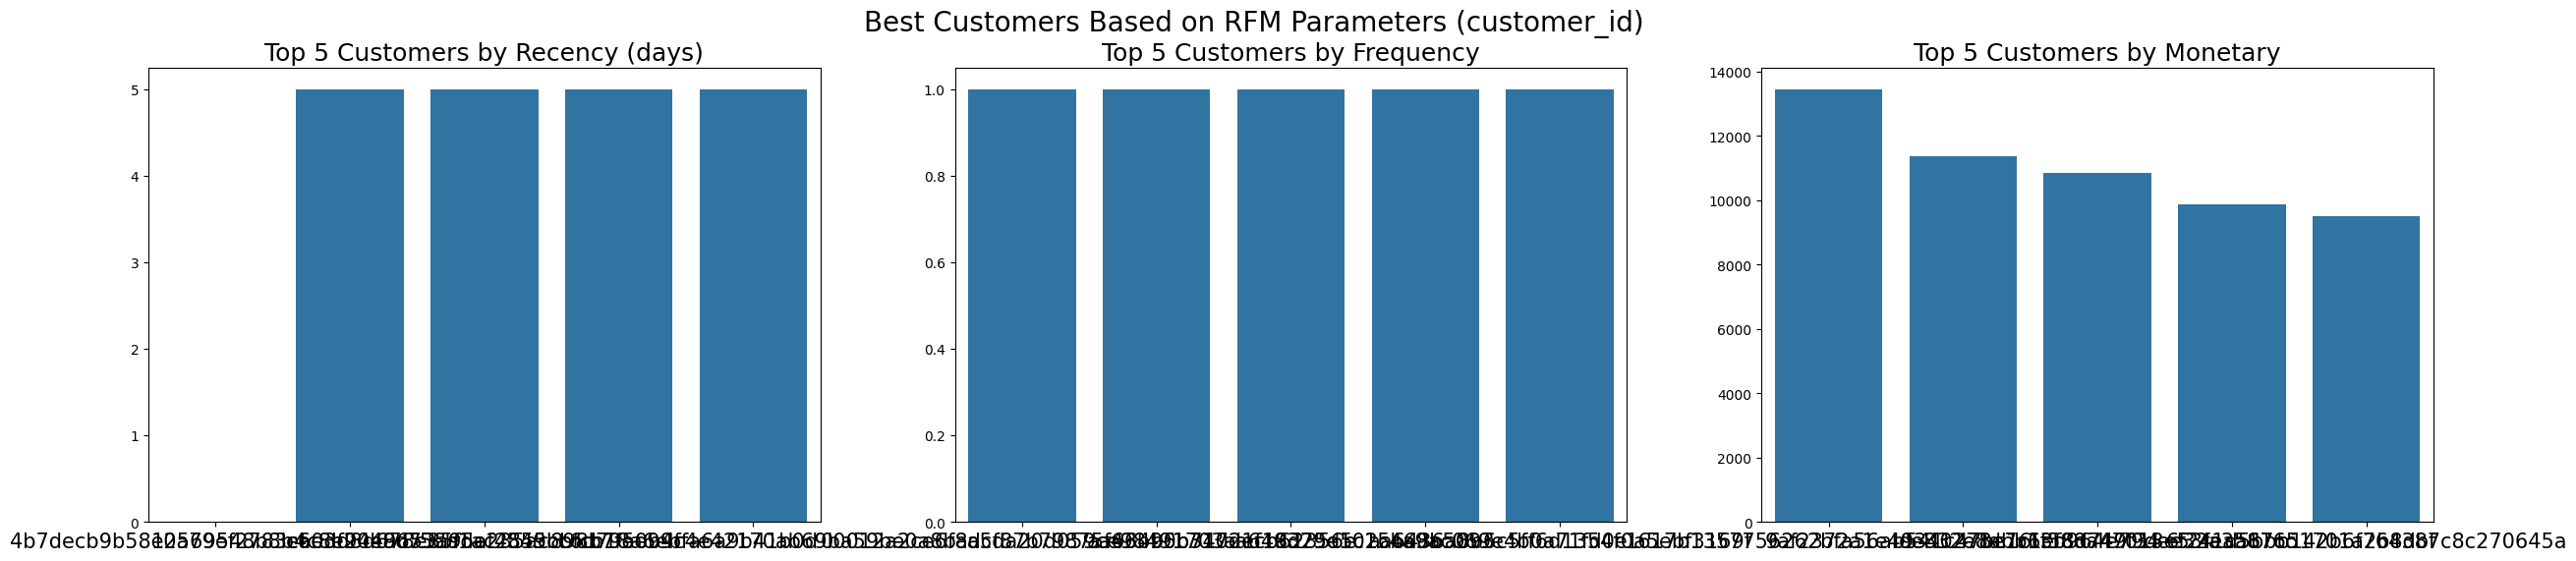

In [75]:
merged_df['total_price'] = merged_df['price']

rfm_df = merged_df.groupby('customer_id').agg({
    'order_purchase_timestamp': 'max',  # Mengambil tanggal order terakhir
    'order_id': 'nunique',  # Menghitung jumlah order unik (Frequency)
    'total_price': 'sum'  # Menghitung total revenue yang dihasilkan (Monetary)
}).reset_index()

rfm_df.columns = ['customer_id', 'last_purchase_date', 'frequency', 'monetary']

rfm_df['last_purchase_date'] = pd.to_datetime(rfm_df['last_purchase_date']).dt.date
most_recent_date = merged_df['order_purchase_timestamp'].dt.date.max()
rfm_df['recency'] = rfm_df['last_purchase_date'].apply(lambda x: (most_recent_date - x).days)

rfm_df.drop('last_purchase_date', axis=1, inplace=True)

print(rfm_df.head())

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top 5 Customers by Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Top 5 Customers by Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), ax=ax[2], legend=False)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Top 5 Customers by Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customers Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Conclusion

1. Pelanggan dari daerah mana atau kebiasaan belanja seperti apa yang paling sering melakukan pembelian ulang?

- Pelanggan dari wilayah SC, Celso Ramos, tercatat sebagai yang paling sering melakukan pembelian ulang dengan frekuensi lebih dari 12 kali. Wilayah-wilayah ini menunjukkan loyalitas pelanggan yang tinggi, sehingga layak menjadi sasaran utama untuk kampanye pemasaran yang lebih intensif. Selain itu, pembeli yang melakukan pembelian ulang cenderung berasal dari segmen dengan pengeluaran rendah hingga menengah, menunjukkan preferensi pada produk dengan harga yang lebih terjangkau. Penerapan strategi seperti diskon atau paket bundling bisa meningkatkan nilai transaksi rata-rata di kalangan pelanggan ini.

2. Produk atau kategori mana yang biasanya mendapat ulasan bagus atau jarang dikembalikan, dan apakah ini ada hubungannya dengan metode pembayaran yang digunakan atau waktu pengirimannya?

- Metode Pembayaran : Rata-rata ulasan produk cenderung konsisten di semua metode pembayaran, sehingga metode pembayaran tidak memiliki pengaruh besar terhadap penilaian produk.
- Waktu Pengiriman : Variasi waktu pengiriman tidak memberikan dampak signifikan terhadap rating produk, karena mayoritas ulasan tetap positif terlepas dari durasi pengirimannya.
- Tingkat Pengembalian : Produk dengan tingkat pengembalian rendah biasanya mendapatkan rating yang lebih tinggi, sedangkan produk dengan tingkat pengembalian tinggi memiliki variasi ulasan yang lebih besar. Hal ini menunjukkan bahwa produk dengan kualitas yang baik atau sesuai ekspektasi konsumen cenderung jarang dikembalikan dan mendapatkan penilaian yang lebih positif.

3. RFM Analysis
- Pelanggan yang tercatat melakukan satu kali pembelian menunjukkan bahwa frekuensi mereka masih rendah, dengan nilai transaksi bervariasi antara Rp54.900 hingga Rp179.990.
- Recency : Rata-rata pelanggan terakhir kali bertransaksi lebih dari 100 hari yang lalu, dengan rentang waktu terlama mencapai 552 hari. Artinya sebagian besar pelanggan tidak melakukan pembelian kembali dalam waktu dekat.
- Monetary : Nilai pembelian pelanggan bervariasi, tetapi masih dalam kisaran yang cukup terjangkau. Artinya adanya peluang untuk meningkatkan nilai rata-rata pembelian melalui penawaran yang lebih menarik atau promosi.





